<a href="https://colab.research.google.com/github/zacharyvunguyen/Brain-Tumor-MR-Image-Classification-using-Transfer-Learning-with-EfficientNet-/blob/main/FINAL_00_Brain_Tumor_MRI_Classification_DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-Processing
## Libraries

In [ ]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import imutils
import matplotlib.pyplot as plt
import PIL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Display images from directories

In [ ]:
def display_images_dir (img_dir,img_per_row):
  folder_num=len(os.listdir(img_dir))
  fig, axs = plt.subplots(folder_num, img_per_row, figsize = (20, img_per_row*4))
  count = 0
  for i in os.listdir(img_dir):
  # get the list of images in a given class 
    train_class = os.listdir(os.path.join(img_dir, i)) #train class
  # plot 5 images per class
    for j in range(img_per_row):
      img = os.path.join(img_dir, i, train_class[j]) #Train/trainclass/imagenames
      img = PIL.Image.open(img)
      axs[count][j].title.set_text(f'{i} - {train_class[j]}')
      axs[count][j].imshow(img)
    count += 1

  fig.tight_layout()

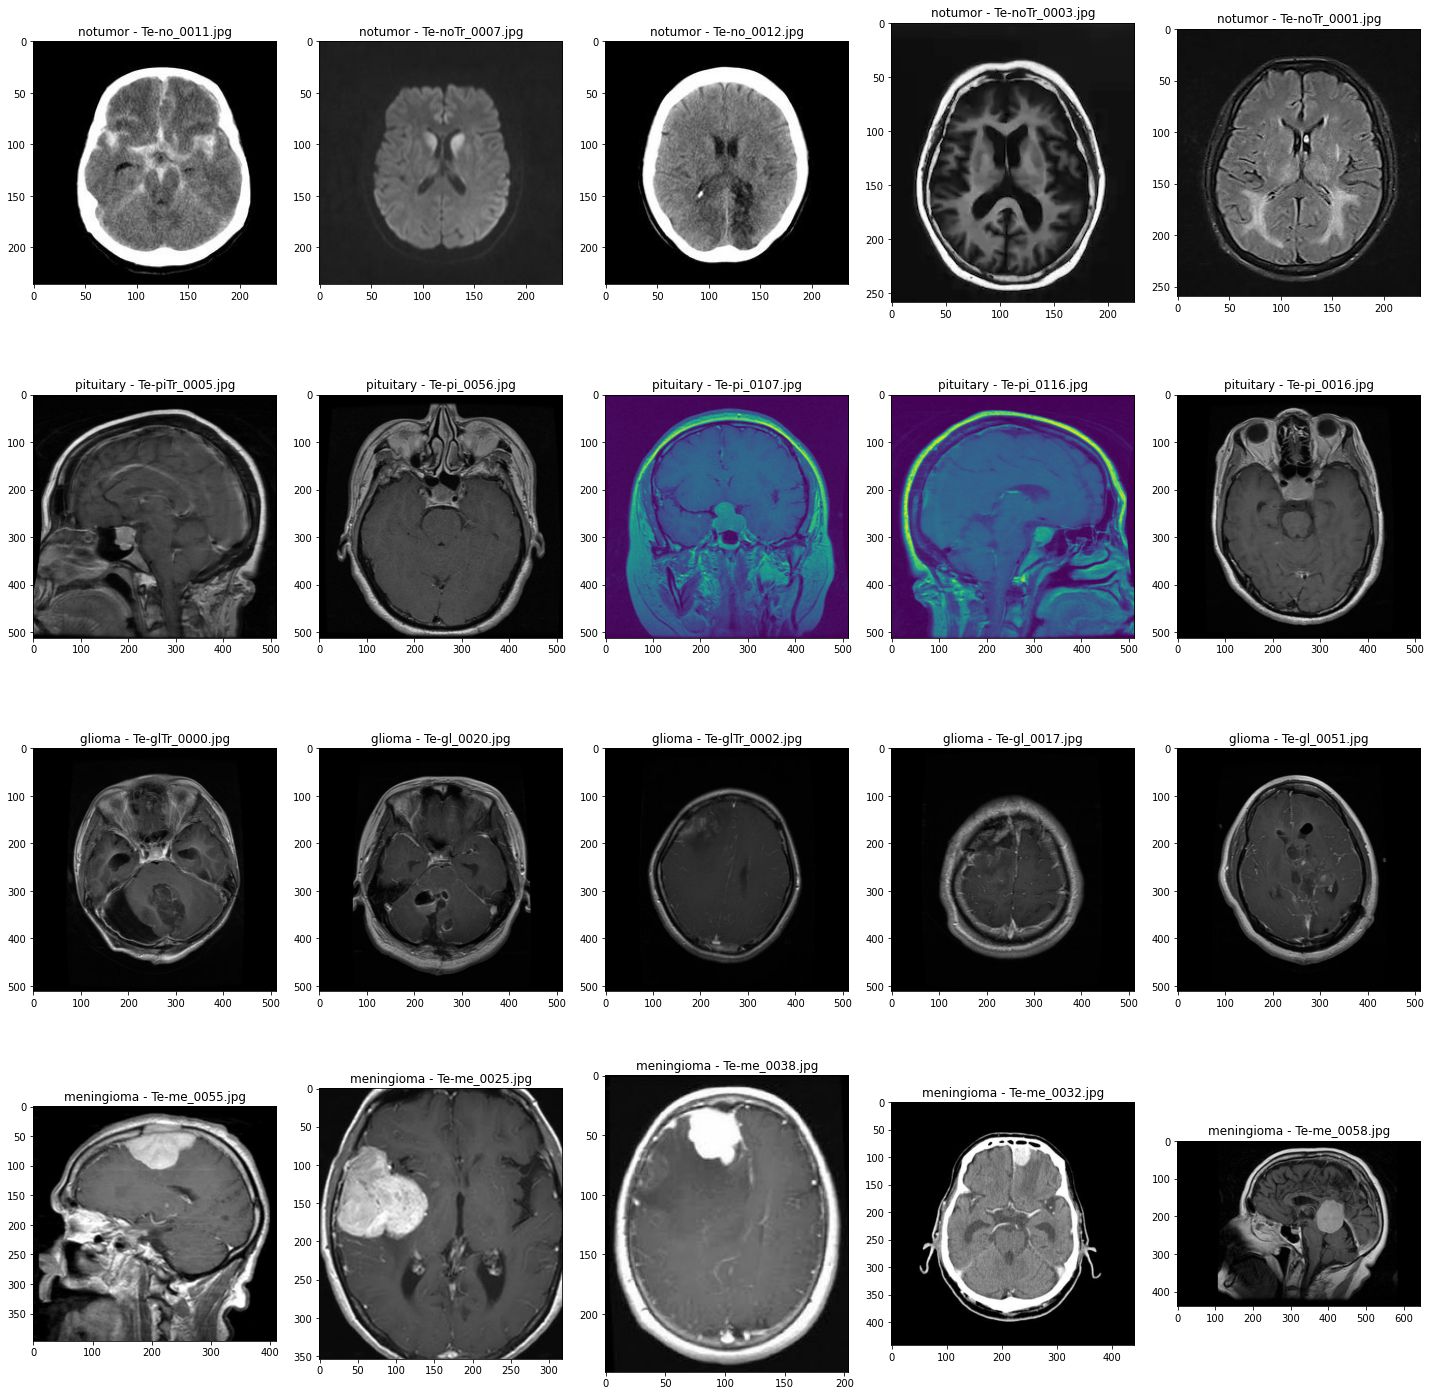

In [ ]:
display_images_dir("/content/drive/MyDrive/0_data_science/mri_brain_tumor/Testing",5)

## Images Cropping
<ul>
<li><span style="font-weight: 400;">To make the MR images uniformly sized, resize all of them to 256x256 pixels</span></li>
<li><span style="font-weight: 400;">Noise was another major issue with the MR images. For this reason, we need to crop out the unnecessary portion of the input images to improve their quality. </span></li>
<li><span style="font-weight: 400;">Exported the cropped MR images to other directory and ready for feeding the model </span></li>
</ul>

In [ ]:
def crop_img(img):
	"""
	Finds the extreme points on the image and crops the rectangular out of them
	"""
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray = cv2.GaussianBlur(gray, (3, 3), 0)

	# threshold the image, then perform a series of erosions +
	# dilations to remove any small regions of noise
	thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations=2)
	thresh = cv2.dilate(thresh, None, iterations=2)

	# find contours in thresholded image, then grab the largest one
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	# find the extreme points
	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
	
	return new_img

### Images cropping step by step
* Step 1. Get the original image
* Step 2. Find the biggest contour
* Step 3. Find the extreme points
* Step 4. Crop the image

![](images/M_cropping.png)

In [ ]:
if __name__ == "__main__":
	training = "/content/drive/MyDrive/0_data_science/mri_brain_tumor/Training"
	testing = "/content/drive/MyDrive/0_data_science/mri_brain_tumor/Testing"
	training_dir = os.listdir(training)
	testing_dir = os.listdir(testing)
	IMG_SIZE = 256

	for dir in training_dir:
		save_path = '/content/drive/MyDrive/0_data_science/mri_brain_tumor/cropped/Training/'+ dir
		path = os.path.join(training,dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path,img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path+'/'+img, new_img)
	
	for dir in testing_dir:
		save_path = '/content/drive/MyDrive/0_data_science/mri_brain_tumor/cropped/Testing/'+ dir
		path = os.path.join(testing,dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path,img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path+'/'+img, new_img)

## Visualize Cropped Images

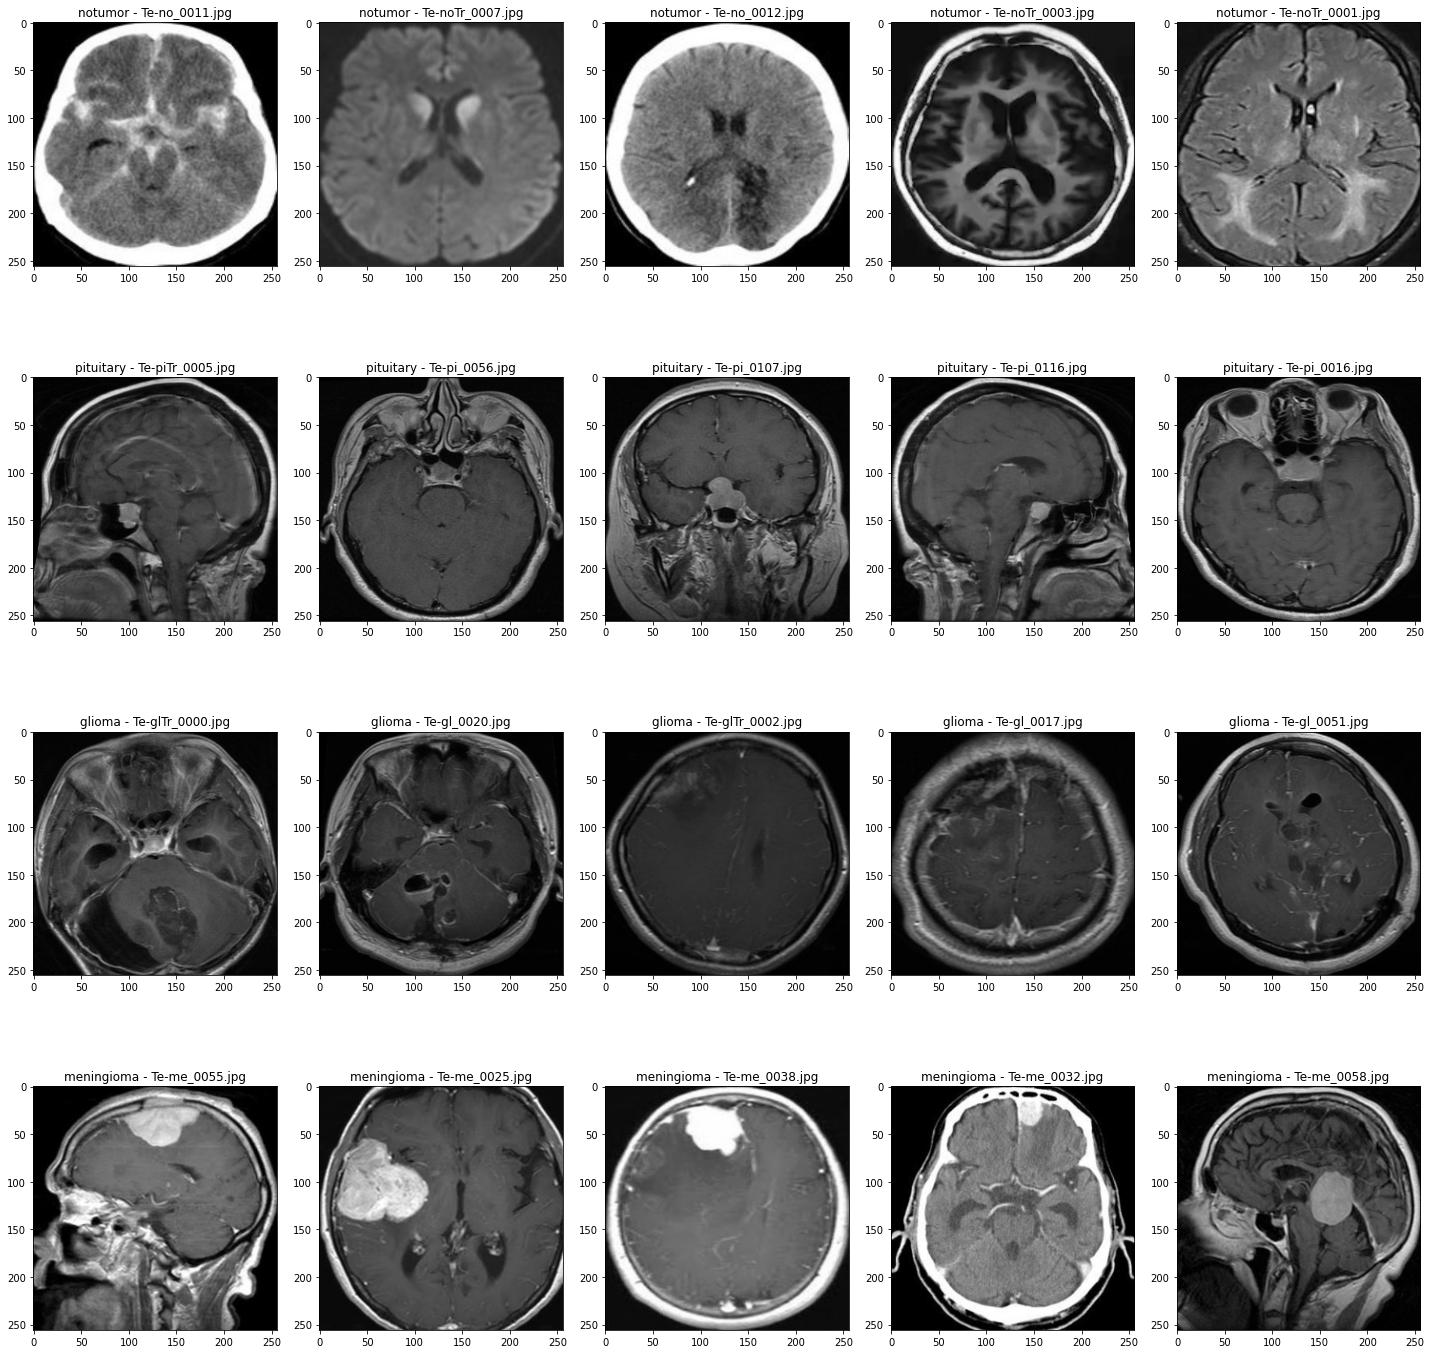

In [ ]:
display_images_dir("/content/drive/MyDrive/0_data_science/mri_brain_tumor/cropped/Testing",5)